In [1]:
from keras.datasets import imdb
import numpy as np

In [2]:
SAMPLING_SIZE = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=SAMPLING_SIZE)

In [3]:
train_data.shape

(25000,)

In [4]:
test_data.shape

(25000,)

In [5]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [6]:
word_index = imdb.get_word_index()

In [7]:
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])

In [8]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [9]:
max = 0
for key, value in reverse_word_index.items():
    if(key > max):
        max = key

In [10]:
max

88584

In [11]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [12]:
decoded_review = " ".join(reverse_word_index.get(i, "?") for i in train_data[0])

In [13]:
decoded_review

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [14]:
reviews_lengths = list(map(lambda review: len(review), train_data))

In [15]:
reviews_lengths

[218,
 189,
 141,
 550,
 147,
 43,
 123,
 562,
 233,
 130,
 450,
 99,
 117,
 238,
 109,
 129,
 163,
 752,
 212,
 177,
 129,
 140,
 256,
 888,
 93,
 142,
 220,
 193,
 171,
 221,
 174,
 647,
 233,
 162,
 597,
 234,
 51,
 336,
 139,
 231,
 704,
 142,
 861,
 132,
 122,
 570,
 55,
 214,
 103,
 186,
 113,
 169,
 469,
 138,
 302,
 766,
 351,
 146,
 59,
 206,
 107,
 152,
 186,
 431,
 147,
 684,
 383,
 324,
 252,
 263,
 787,
 211,
 314,
 118,
 390,
 132,
 710,
 306,
 167,
 115,
 95,
 158,
 156,
 82,
 502,
 314,
 190,
 174,
 60,
 145,
 214,
 659,
 408,
 515,
 461,
 202,
 238,
 170,
 107,
 171,
 158,
 145,
 790,
 258,
 287,
 67,
 123,
 975,
 775,
 236,
 195,
 274,
 214,
 91,
 1038,
 815,
 183,
 206,
 50,
 118,
 147,
 141,
 60,
 56,
 439,
 439,
 213,
 144,
 533,
 303,
 203,
 563,
 129,
 153,
 55,
 92,
 174,
 187,
 183,
 165,
 78,
 198,
 156,
 223,
 127,
 61,
 362,
 84,
 57,
 176,
 159,
 57,
 159,
 165,
 213,
 194,
 149,
 130,
 203,
 19,
 98,
 466,
 525,
 130,
 322,
 153,
 408,
 215,
 472,
 143,
 1

We can see that each review has a different length. But for the model to process each review, they need to be in the same format. To achieve this we can use;<br />
1 ) Padding<br />
2 ) One-Hot Encoding<br />
Reference: Page 69

In [16]:
def vectorize_review(review, size=SAMPLING_SIZE):
    vector = np.zeros(size)
    for word in review:
        vector[word] = 1
    return vector
    

In [17]:
def transform_data(data, y_axis):
    array = np.ndarray((len(data),y_axis), dtype=np.float32)
    for i in range(len(array)):
        array[i] = vectorize_review(data[i])
    return array

In [18]:
vectorized_training_data = transform_data(train_data, SAMPLING_SIZE)
vectorized_testing_data = transform_data(test_data, SAMPLING_SIZE)

In [19]:
vectorized_training_data.shape

(25000, 10000)

In [20]:
vectorized_testing_data.shape

(25000, 10000)

In [21]:
vectorized_training_data[0]

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [22]:
vectorized_training_labels = np.asarray(train_labels).astype(np.float32)
vectorized_test_labels = np.asarray(test_labels).astype(np.float32)

In [23]:
from keras import models
from keras import layers

In [24]:
model = models.Sequential()

model.add(layers.Dense(16, activation="relu", input_shape=(SAMPLING_SIZE,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [25]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [26]:
x_val = vectorized_training_data[:10000]
x_train = vectorized_training_data[10000:]

y_val = vectorized_training_labels[:10000]
y_train = vectorized_training_labels[10000:]

In [27]:
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 3s 30ms/step - loss: 0.5235 - accuracy: 0.7843 - val_loss: 0.3983 - val_accuracy: 0.8618
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3140 - accuracy: 0.8977 - val_loss: 0.3056 - val_accuracy: 0.8876
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2282 - accuracy: 0.9265 - val_loss: 0.2787 - val_accuracy: 0.8914
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1798 - accuracy: 0.9421 - val_loss: 0.2722 - val_accuracy: 0.8916
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1430 - accuracy: 0.9537 - val_loss: 0.2810 - val_accuracy: 0.8903
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1151 - accuracy: 0.9654 - val_loss: 0.3021 - val_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0993 - accuracy: 0.9690 - val_loss: 0.3107 - val_accuracy: 0.8833
Epoch 8/20
30

In [28]:
results = model.evaluate(vectorized_testing_data, vectorized_test_labels)

782/782 [==============================] - 2s 3ms/step - loss: 0.7653 - accuracy: 0.8502


In [29]:
hist_dict = history.history

In [30]:
hist_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
hist_dict["accuracy"]

[0.784333348274231,
 0.8976666927337646,
 0.9264666438102722,
 0.9421333074569702,
 0.9537333250045776,
 0.965399980545044,
 0.968999981880188,
 0.978866696357727,
 0.9793999791145325,
 0.9856666922569275,
 0.9901999831199646,
 0.9914000034332275,
 0.9954666495323181,
 0.9955333471298218,
 0.9957333207130432,
 0.9961333274841309,
 0.9992666840553284,
 0.9988666772842407,
 0.9981333613395691,
 0.9998666644096375]

In [32]:
import matplotlib.pyplot as plt

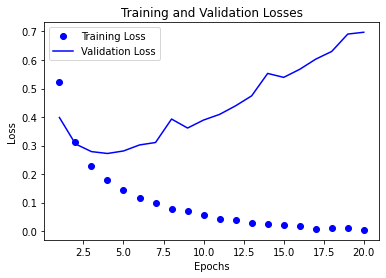

In [33]:
plt.plot(range(1, len(hist_dict["loss"]) + 1), hist_dict["loss"], "bo", label="Training Loss")
plt.plot(range(1, len(hist_dict["val_loss"]) + 1), hist_dict["val_loss"], "b", label="Validation Loss")
plt.title("Training and Validation Losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [34]:
plt.clf()

<Figure size 432x288 with 0 Axes>

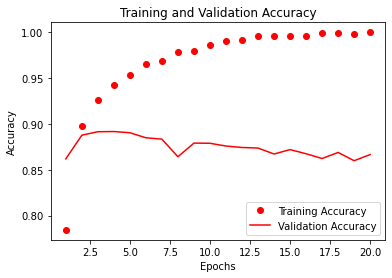

In [35]:
plt.plot(range(1, len(hist_dict["accuracy"]) + 1), hist_dict["accuracy"], "ro", label="Training Accuracy")
plt.plot(range(1, len(hist_dict["val_accuracy"]) + 1), hist_dict["val_accuracy"], "r", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

Epoch around 3 or 4 seems the be the best epoch.

In [36]:
model = models.Sequential()

model.add(layers.Dense(128, activation="relu", input_shape=(SAMPLING_SIZE,)))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [37]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [38]:
model.fit(
    x_train,
    y_train,
    epochs=4,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/4
30/30 [==============================] - 1s 32ms/step - loss: 0.4289 - accuracy: 0.8160 - val_loss: 0.2747 - val_accuracy: 0.8904
Epoch 2/4
30/30 [==============================] - 1s 22ms/step - loss: 0.1728 - accuracy: 0.9363 - val_loss: 0.3145 - val_accuracy: 0.8791
Epoch 3/4
30/30 [==============================] - 1s 18ms/step - loss: 0.0962 - accuracy: 0.9683 - val_loss: 0.3597 - val_accuracy: 0.8777
Epoch 4/4
30/30 [==============================] - 1s 19ms/step - loss: 0.0474 - accuracy: 0.9885 - val_loss: 0.4276 - val_accuracy: 0.8743


In [39]:
model.evaluate(vectorized_testing_data, vectorized_test_labels)

782/782 [==============================] - 2s 2ms/step - loss: 0.4704 - accuracy: 0.8615


[0.4703831374645233, 0.861519992351532]

In [40]:
test_results = model.predict(vectorized_testing_data)

782/782 [==============================] - 1s 1ms/step


In [41]:
test_results

array([[0.09001104],
       [0.99999297],
       [0.85183823],
       ...,
       [0.00963772],
       [0.03162696],
       [0.89835805]], dtype=float32)